# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

NumExpr defaulting to 8 threads.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
# Carregar a base de dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

# Converter a coluna 'num' para indicar saúde (0 para saudável, 1 para doente)
df['health_status'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Estatísticas por sexo
stats = df.groupby('sex')['health_status'].agg(['sum', 'count'])
stats.columns = ['doentes', 'total']
stats['saudaveis'] = stats['total'] - stats['doentes']
stats['media_doentes'] = stats['doentes'] / stats['total']
stats['odds'] = stats['doentes'] / stats['saudaveis']

# Odds Ratio e Logito (log(odds))
odds_ref = stats['odds'].sum() / len(stats)  # odds total para a referência
stats['odds_ratio'] = stats['odds'] / odds_ref
stats['log_odds'] = np.log(stats['odds'])
stats['woe'] = np.log(stats['odds_ratio'])  # Weight of Evidence

# Exibir o resultado
print(stats)

     doentes  total  saudaveis  media_doentes      odds  odds_ratio  log_odds  \
sex                                                                             
0.0       25     97         72       0.257732  0.347222    0.437762  -1.05779   
1.0      114    206         92       0.553398  1.239130    1.562238   0.21441   

          woe  
sex            
0.0 -0.826081  
1.0  0.446120  


O código realiza uma análise exploratória da variável "sex" na base de dados de doenças cardíacas, identificando a relação entre sexo e presença de doença. Ele categoriza indivíduos como saudáveis ou doentes e calcula estatísticas como odds e odds ratio, além do logito e WOE (Weight of Evidence) para avaliar a associação entre cada sexo e a probabilidade de doença cardíaca. Os resultados indicam que homens têm maior chance de desenvolver doenças cardíacas em comparação com a média, enquanto mulheres apresentam uma probabilidade menor, evidenciando uma possível associação entre o sexo e o risco de doenças cardíacas nesta amostra.

2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [6]:
# Carregar a base de dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

# Converter a coluna 'num' para indicar saúde (0 para saudável, 1 para doente)
df['health_status'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Categorizar a variável 'age' em 5 grupos
df['age_group'] = pd.qcut(df['age'], 5, labels=['G1', 'G2', 'G3', 'G4', 'G5'])

# Calcular estatísticas por grupo de idade com o parâmetro observed=True para evitar o aviso
stats_age = df.groupby('age_group', observed=True).agg(
    doentes=('health_status', 'sum'),
    total=('health_status', 'count'),
    idade_media=('age', 'mean')
)

# Calcular o número de saudáveis, média de doentes e odds
stats_age['saudaveis'] = stats_age['total'] - stats_age['doentes']
stats_age['media_doentes'] = stats_age['doentes'] / stats_age['total']
stats_age['odds'] = stats_age['doentes'] / stats_age['saudaveis']

# Odds Ratio e Logito (log(odds))
odds_ref = stats_age['odds'].sum() / len(stats_age)  # odds total para a referência
stats_age['odds_ratio'] = stats_age['odds'] / odds_ref
stats_age['log_odds'] = np.log(stats_age['odds'])
stats_age['woe'] = np.log(stats_age['odds_ratio'])  # Weight of Evidence

# Exibir o resultado
print(stats_age)


           doentes  total  idade_media  saudaveis  media_doentes      odds  \
age_group                                                                    
G1              16     63    41.222222         47       0.253968  0.340426   
G2              22     64    50.000000         42       0.343750  0.523810   
G3              39     71    56.211268         32       0.549296  1.218750   
G4              32     45    60.355556         13       0.711111  2.461538   
G5              30     60    66.516667         30       0.500000  1.000000   

           odds_ratio  log_odds       woe  
age_group                                  
G1           0.306993 -1.077559 -1.180932  
G2           0.472367 -0.646627 -0.750000  
G3           1.099057  0.197826  0.094453  
G4           2.219793  0.900787  0.797414  
G5           0.901791  0.000000 -0.103373  


O código realiza uma análise bivariada da variável age, categorizando-a em cinco grupos (G1 a G5). Para cada grupo, são calculados: número de doentes, total de indivíduos, idade média, número de saudáveis, média de doentes (proporção), odds (chances de ser doente), odds ratio (comparação com o odds médio) e o logito (logaritmo das odds). O Weight of Evidence (WOE) indica a força da associação de cada faixa etária com a presença de doenças cardíacas. Os resultados mostram que as chances de doença cardíaca aumentam nas faixas etárias intermediárias (G3 e G4), sugerindo uma relação positiva entre idade e risco de doença até certa faixa, com diminuição nos grupos extremos (G1 e G5).

3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

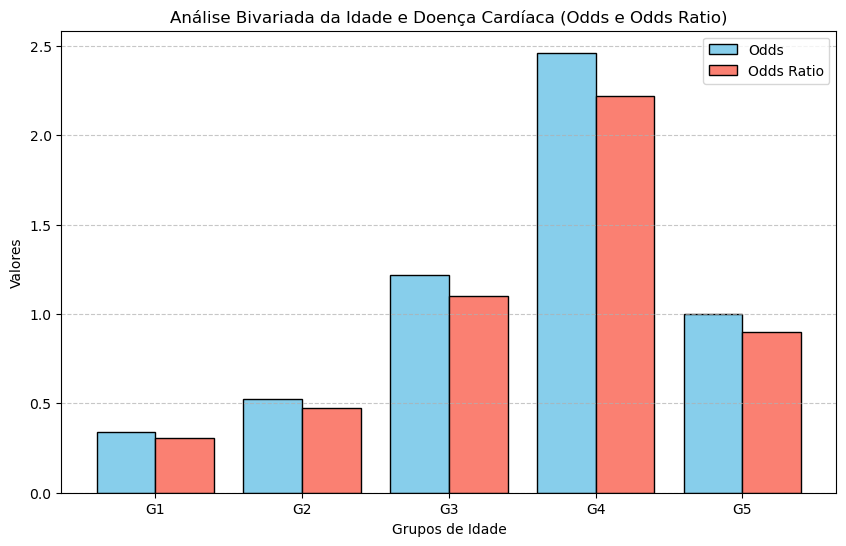

In [7]:
# Carregar a base de dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

# Converter a coluna 'num' para indicar saúde (0 para saudável, 1 para doente)
df['health_status'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Categorizar a variável 'age' em 5 grupos
df['age_group'] = pd.qcut(df['age'], 5, labels=['G1', 'G2', 'G3', 'G4', 'G5'])

# Calcular estatísticas por grupo de idade
stats_age = df.groupby('age_group', observed=True).agg(
    doentes=('health_status', 'sum'),
    total=('health_status', 'count'),
    idade_media=('age', 'mean')
)

# Calcular o número de saudáveis, média de doentes e odds
stats_age['saudaveis'] = stats_age['total'] - stats_age['doentes']
stats_age['media_doentes'] = stats_age['doentes'] / stats_age['total']
stats_age['odds'] = stats_age['doentes'] / stats_age['saudaveis']

# Odds Ratio e Logito (log(odds))
odds_ref = stats_age['odds'].sum() / len(stats_age)  # odds total para a referência
stats_age['odds_ratio'] = stats_age['odds'] / odds_ref
stats_age['log_odds'] = np.log(stats_age['odds'])
stats_age['woe'] = np.log(stats_age['odds_ratio'])  # Weight of Evidence

# Visualização
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para odds e odds_ratio
age_groups = stats_age.index
odds = stats_age['odds']
odds_ratio = stats_age['odds_ratio']

width = 0.4  # largura das barras
positions = np.arange(len(age_groups))

# Barras de Odds
ax1.bar(positions - width/2, odds, width=width, color='skyblue', edgecolor='black', label='Odds')
# Barras de Odds Ratio
ax1.bar(positions + width/2, odds_ratio, width=width, color='salmon', edgecolor='black', label='Odds Ratio')

# Configurações do gráfico
ax1.set_xticks(positions)
ax1.set_xticklabels(age_groups)
ax1.set_xlabel('Grupos de Idade')
ax1.set_ylabel('Valores')
ax1.set_title('Análise Bivariada da Idade e Doença Cardíaca (Odds e Odds Ratio)')
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()


A conclusão do gráfico indica que a probabilidade de desenvolver doença cardíaca aumenta nas faixas etárias intermediárias, especialmente no grupo G4, que apresenta os maiores valores de odds e odds ratio. Esse resultado sugere que indivíduos de idade mais avançada têm uma maior predisposição a doenças cardíacas, alcançando o pico nesse grupo específico, antes de reduzir ligeiramente no grupo mais velho (G5). Assim, a idade é um fator de risco importante, com impacto significativo nas chances de desenvolver problemas cardíacos até certo ponto.